![Soccer](Soccer.jpg)

# EPL Soccer Data: An exploratory data analysis using python



The English Premier League (EPL) is the top professional football (soccer) in England. It is one of the most important and widely watched football leagues in the world. The EPL consists of 20 teams that compete against each other in a round-robin format. 

- Each team plays every other team exactly once, home and away (two matches per team).
- The total number of matches in a season is calculated by the formula [teams * (teams - 1)]. In this case, with 20 teams, there are 20 * 19 = 380 matches in a season.
- Teams receive points for each match based on the outcome: 3 points for a win, 1 point for a draw, and 0 points for a loss.
- The team with the most points at the end of the season is crowned the EPL champion.


This dataset contains data of every game from the 2018-2019 season in the English Premier League. In this project I perform exploratory analysis and identify interesting trends to answer specific questions from the data using python.


[Source](https://data.world/chas/2018-2019-premier-league-matches) of dataset.

## Data Dictionary
| Column    | Explanation                                   |
| --------- | --------------------------------------------- |
| Div       | Division the game was played in               |                            
| Date      | The date the game was played                  |
| HomeTeam  | The home team                                 |
| AwayTeam  | The away team                                 |
| FTHG      | Full time home goals                          |
| FTAG      | Full time away goals                          |
| FTR       | Full time result                              |
| HTHG      | Half time home goals                          |
| HTAG      | Half time away goals                          |
| HTR       | Half time result                              |
| Referee   | The referee of the game                       |
| HS        | Number of shots taken by home team            |
| AS        | Number of shots taken by away team            |
| HST       | Number of shots taken by home team on target  |
| AST       | Number of shots taken by away team on target  |
| HF        | Number of fouls made by home team             |
| AF        | Number of fouls made by away team             |
| HC        | Number of corners taken by home team          |
| AC        | Number of corners taken by away team          |
| HY        | Number of yellow cards received by home team  |
| AY        | Number of yellow cards received by away team  |
| HR        | Number of red cards received by home team     |
| AR        | Number of red cards received by away team     |



# Project tasks

1. What Team committed the most fouls?
2. What is the distribution of the features of the game? Are there outliers?
3. For a team winning at half time, how does it change at full time?
4. Does the number of red cards a team receives have an effect on its probability of winning a game?

In [1]:
# importing relevant packages for analysis

import pandas as pd
import matplotlib.pyplot as plt

# reading csv files into a dataframe
soccer = pd.read_csv('soccer18-19.csv')
print('Number of rows and columns: ', soccer.shape)
print(soccer.head(10))

Number of rows and columns:  (380, 23)
  Div     Date      HomeTeam        AwayTeam  FTHG  ...  AC HY  AY  HR AR
0  E0  10/8/18    Man United       Leicester     2  ...   5  2   1   0  0
1  E0  11/8/18   Bournemouth         Cardiff     2  ...   4  1   1   0  0
2  E0  11/8/18        Fulham  Crystal Palace     0  ...   5  1   2   0  0
3  E0  11/8/18  Huddersfield         Chelsea     0  ...   5  2   1   0  0
4  E0  11/8/18     Newcastle       Tottenham     1  ...   5  2   2   0  0
5  E0  11/8/18       Watford        Brighton     2  ...   2  2   2   0  0
6  E0  11/8/18        Wolves         Everton     2  ...   6  0   1   0  1
7  E0  12/8/18       Arsenal        Man City     0  ...   9  2   2   0  0
8  E0  12/8/18     Liverpool        West Ham     4  ...   4  1   2   0  0
9  E0  12/8/18   Southampton         Burnley     0  ...   5  0   1   0  0

[10 rows x 23 columns]


# Exploring the soccer dataframe

This is to understand the nature and characteristics of the dataset.
- Column features and data types
- Summary statistics
- Presence of null values
- Distinct values
- Inconsistencies with data values

In [56]:
#Provides information about columns in the dataset
soccer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Div       380 non-null    object
 1   Date      380 non-null    object
 2   HomeTeam  380 non-null    object
 3   AwayTeam  380 non-null    object
 4   FTHG      380 non-null    int64 
 5   FTAG      380 non-null    int64 
 6   FTR       380 non-null    object
 7   HTHG      380 non-null    int64 
 8   HTAG      380 non-null    int64 
 9   HTR       380 non-null    object
 10  Referee   380 non-null    object
 11  HS        380 non-null    int64 
 12  AS        380 non-null    int64 
 13  HST       380 non-null    int64 
 14  AST       380 non-null    int64 
 15  HF        380 non-null    int64 
 16  AF        380 non-null    int64 
 17  HC        380 non-null    int64 
 18  AC        380 non-null    int64 
 19  HY        380 non-null    int64 
 20  AY        380 non-null    int64 
 21  HR        380 no

In [55]:
#Computing summary statistics
soccer.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.568421,1.252632,0.678947,0.573684,14.134211,11.144737,4.778947,3.928947,10.152632,10.305263,5.705263,4.552632,1.526316,1.684211,0.047368,0.076316
std,1.312836,1.180031,0.860802,0.766958,5.855371,4.654002,2.677686,2.283982,3.293532,3.503707,2.971718,2.730627,1.222844,1.209140,0.212706,0.275599
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,8.000000,4.000000,2.750000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000,5.000000,4.000000,10.000000,10.000000,5.000000,4.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,18.000000,14.000000,6.000000,5.250000,12.000000,13.000000,8.000000,6.000000,2.000000,2.000000,0.000000,0.000000
max,6.000000,6.000000,4.000000,3.000000,36.000000,25.000000,14.000000,12.000000,23.000000,21.000000,16.000000,14.000000,6.000000,5.000000,1.000000,2.000000


In [54]:
# To check for missing values
soccer.isna().sum()

Div         0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

In [62]:
#Checking for unique soccer teams
soccer['HomeTeam'].unique()

array(['Man United', 'Bournemouth', 'Fulham', 'Huddersfield', 'Newcastle',
       'Watford', 'Wolves', 'Arsenal', 'Liverpool', 'Southampton',
       'Cardiff', 'Chelsea', 'Everton', 'Leicester', 'Tottenham',
       'West Ham', 'Brighton', 'Burnley', 'Man City', 'Crystal Palace'],
      dtype=object)

During data exploration, some inconsistencies were discovered in the Date column. Some are represented in the date object type and some in the string object type. Also, there is an inconsistency in Date formatting as seen below.


In [5]:
soccer['Date'].head(20)

0        10/8/18
1        11/8/18
2        11/8/18
3        11/8/18
4        11/8/18
5        11/8/18
6        11/8/18
7        12/8/18
8        12/8/18
9        12/8/18
10    18/08/2018
11    18/08/2018
12    18/08/2018
13    18/08/2018
14    18/08/2018
15    18/08/2018
16    19/08/2018
17    19/08/2018
18    19/08/2018
19    20/08/2018
Name: Date, dtype: object

In [9]:
#To resolve those inconsistencies
soccer['Date'] = pd.to_datetime(soccer['Date'], errors = 'coerce', infer_datetime_format= True)

print(soccer['Date'].head(20))
print(soccer)

0    2018-10-08
1    2018-11-08
2    2018-11-08
3    2018-11-08
4    2018-11-08
5    2018-11-08
6    2018-11-08
7    2018-12-08
8    2018-12-08
9    2018-12-08
10   2018-08-18
11   2018-08-18
12   2018-08-18
13   2018-08-18
14   2018-08-18
15   2018-08-18
16   2018-08-19
17   2018-08-19
18   2018-08-19
19   2018-08-20
Name: Date, dtype: datetime64[ns]
    Div       Date      HomeTeam        AwayTeam  FTHG  ...  AC HY  AY  HR AR
0    E0 2018-10-08    Man United       Leicester     2  ...   5  2   1   0  0
1    E0 2018-11-08   Bournemouth         Cardiff     2  ...   4  1   1   0  0
2    E0 2018-11-08        Fulham  Crystal Palace     0  ...   5  1   2   0  0
3    E0 2018-11-08  Huddersfield         Chelsea     0  ...   5  2   1   0  0
4    E0 2018-11-08     Newcastle       Tottenham     1  ...   5  2   2   0  0
..   ..        ...           ...             ...   ...  ...  .. ..  ..  .. ..
375  E0 2019-12-05     Liverpool          Wolves     2  ...   1  0   2   0  0
376  E0 2019-12-05    

# Analysis

# 1. What team committed the most fouls?
That is, for each team, which club committed the most fouls?

This is answered by finding out the average fouls made by each club in the 2018–2019 season for the home and away teams.

In [2]:
#subsetting required columns

fouls_data = soccer[['Date', 'HomeTeam', 'AwayTeam', 'HF', 'AF' ]]
fouls_data['Date'] = pd.to_datetime(fouls_data['Date']).dt.year
#print(fouls_data)

#To find the clubs who have commited the most fouls in the home team
home_fouls = fouls_data[['HomeTeam', 'HF']]
home_fouls = home_fouls.groupby('HomeTeam')['HF'].agg(avg_fouls_home = 'mean').round(2).sort_values(by = 'avg_fouls_home', ascending = False)

#To find the clubs who have commited the most fouls in the away team
away_fouls = fouls_data[['AwayTeam', 'AF']]
away_fouls = away_fouls.groupby('AwayTeam')['AF'].agg(avg_fouls_away = 'mean').round(2).sort_values(by = 'avg_fouls_away', ascending = False)

#Selects the teams who made the most fouls in the home and away team
print(home_fouls.head(3))
print(away_fouls.head(3))

             avg_fouls_home
HomeTeam                   
Brighton              11.63
Watford               11.63
Southampton           11.53
            avg_fouls_away
AwayTeam                  
Brighton             12.74
Fulham               11.79
Man United           11.58


## The results above show the top 3 teams in the home and away teams with the most fouls.
Brighton and Watford were the home teams that committed the most fouls on average. On the away team, however, Brighton topped the table with even more fouls than on the home team, followed by Fulham.

# 2. What is the distribution of the features of the game? Are there outliers?

Every game is characterized by a number of factors, including the number of red and yellow cards received by each team, half-time and full-time goals from the home and away teams, the referee of the game, the number of shots, the number of corner kicks, etc.

This question seeks to view the distribution and outliers of these features for the 380 matches in the 2018–2019 season.

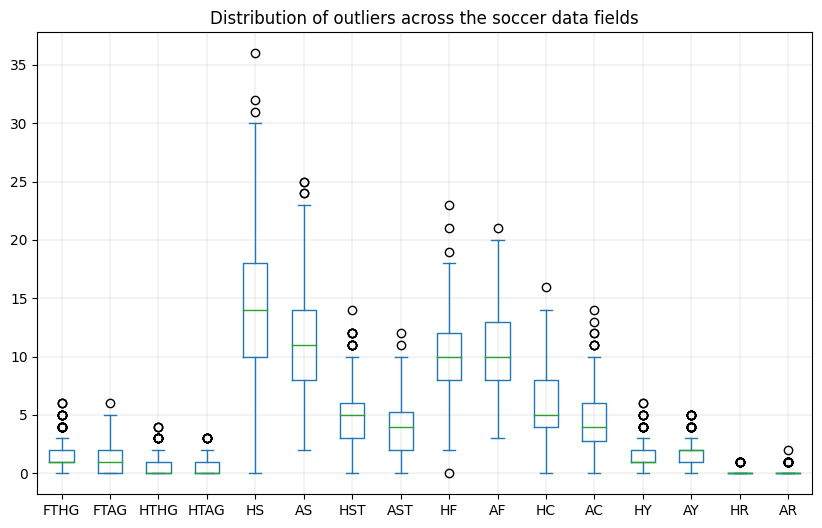

In [5]:
soccer.plot(kind = 'box', title = 'Distribution of outliers across the soccer data fields', 
            figsize = (10,6))
plt.grid(True, linewidth = 0.2)
plt.show()


- The home team has the largest distribution of shots taken(HS) when conmpared to the number of shots taken by the away team(AS)
- There is also an unusal high amount - outliers - of corner kicks(AC) by the away team

# 3. For a team winning at half time, how does it change at full time?

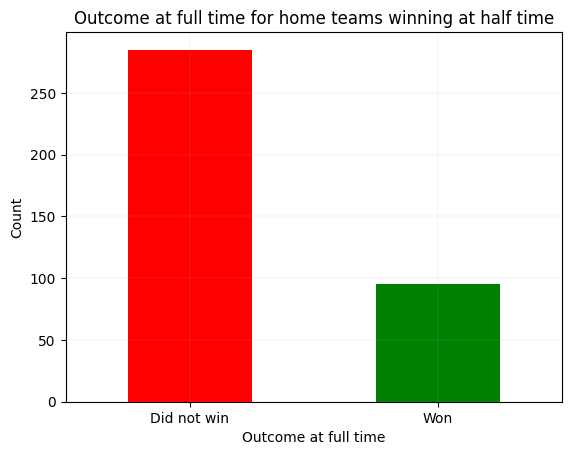

In [5]:
#subsetting relevant columns
soccer_df = soccer[['FTHG', 'FTAG', 'HTHG', 'HTAG']]
#print(soccer_df)

#To verify what teams were winning at half time
soccer_df['half_time_home'] = (soccer_df['HTHG'] > soccer_df['HTAG']).astype(int)
soccer_df['half_time_away'] = (soccer_df['HTHG'] < soccer_df['HTAG']).astype(int)


#To verify what teams won at full time
soccer_df['full_time_home'] = (soccer_df['FTHG'] > soccer_df['FTAG']).astype(int)
soccer_df['full_time_away'] = (soccer_df['FTHG'] < soccer_df['FTAG']).astype(int)


# Determine what home teams that won at half time won or didn't win by full time
soccer_df['outcome_at_full_time_home'] = 0 #Default for 'Did not win'
soccer_df.loc[soccer_df['half_time_home'] == soccer_df['full_time_home'], 'outcome_at_full_time_home'] = 1 #'Won'

#Determine what away teams that won at half time won or didn't win by full time
soccer_df['outcome_at_full_time_away'] = 0 #Default for 'Did not win'
soccer_df.loc[soccer_df['half_time_away'] == soccer_df['full_time_away'], 'outcome_at_full_time_away'] = 1 #'Won'

#Visualize the outcomes for home teams
outcome_counts_home = soccer_df['outcome_at_full_time_home'].value_counts()
outcome_counts_home.plot(kind = 'bar', color = ['Red', 'Green'])
plt.title('Outcome at full time for home teams winning at half time')
plt.xlabel('Outcome at full time')
plt.ylabel('Count')
plt.xticks([0,1], ['Did not win', 'Won'], rotation = 0)
plt.grid(True, linewidth = -0.1)
plt.show()


## Context: Between 2018 and 2019, there were 380 games.
## The visual above shows that for home teams winning at halftime, 285 of the games at full time did not end in a win.

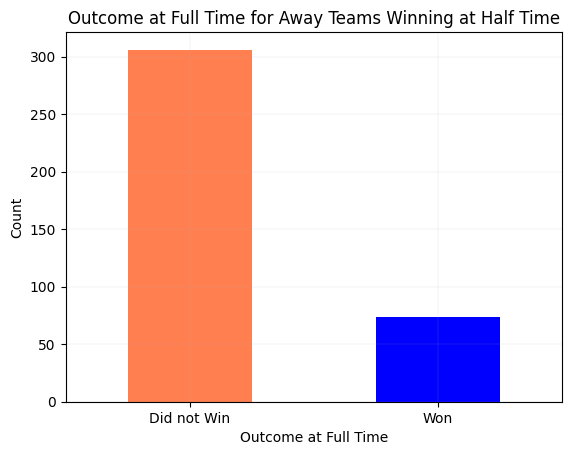

In [8]:
# Visualize the outcomes for away teams
outcome_counts_away = soccer_df['outcome_at_full_time_away'].value_counts()
outcome_counts_away.plot(kind='bar', color=['coral', 'blue'])
plt.title('Outcome at Full Time for Away Teams Winning at Half Time')
plt.xlabel('Outcome at Full Time')
plt.ylabel('Count')
plt.xticks([0, 1], ['Did not Win', 'Won'], rotation=0)
plt.grid(True, linewidth = -0.1)
plt.show()

## For the away teams it was discovered that 305 games winning at half time did not end up in a win.

# 4. Does the number of red cards a team receives have an effect on its probability of winning a game?

          Outcome        HR        AR
Outcome  1.000000 -0.146152  0.042448
HR      -0.146152  1.000000  0.028190
AR       0.042448  0.028190  1.000000


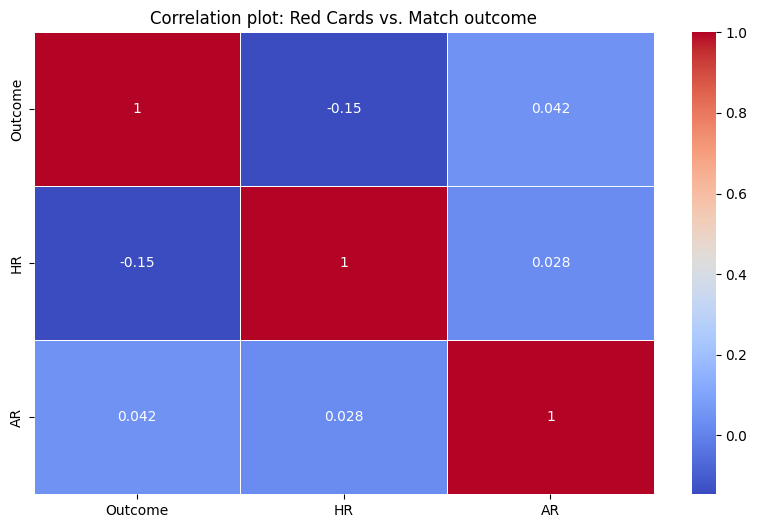

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

#Map the outcome to numerical values (1 for home win, 0 for draw, -1 for away win)
soccer['Outcome'] = soccer['FTR'].map({'H': 1, 'D':0, 'A': -1})

#Create a dataframe with relevant columns
correlation_data = soccer[['Outcome', 'HR', 'AR']]

#Compute correlation matrix
correlation_matrix = correlation_data.corr()
print(correlation_matrix)

#Create a heatmap of the correlation matrix
plt.figure(figsize = (10,6))
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm', linewidth = 0.5)
plt.title('Correlation plot: Red Cards vs. Match outcome')
plt.show()



## Outcome represents the final results, whether it is a home win, draw, or away win.
- HR = number of red cards by the home team.
- AR = number of red cards by the away team

## The heatmap above shows correlation coefficients (r) between variables. Our interest lies in the 'Outcome and AR' & 'Outcome and HR' correlation coefficients.

1. Outcome and AR correlation coefficient: 0.042
- A coefficient close to zero suggests a very weak and almost negligible linear relationship between the number of red cards received by the away team and the match outcome.
- This also indicates that, based on linear correlation alone, there is little evidence to suggest a strong association between the number of red cards received by the away team and the probability of winning the game.


2. Outcome and HR correlation coefficient = - 0.15
- This indicates a negative linear relationship between the number of red cards received by the home team and the outcome of the game.
- This weak negative association means that there is a slight tendency for more red cards from the home team to be associated with a lower probability of winning, but again, the probability is not strong.